In [38]:
# importing required libraries

import warnings
warnings.filterwarnings('ignore') 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [39]:
# read the collected data - stored in Leads csv file
df = pd.read_csv('Leads.csv')
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [40]:
# Let's look at the information of all the columns available
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

<span style="color: teal;font-weight: bold;">We can see that there are 37 columns and 9240 records present in the dataset Also, on a closer look we can spot a few columns with null values as well.</span>

In [41]:
# let's look at the null percentage of each column
df.isnull().sum().sort_values(ascending=False)/9240*100

Lead Quality                                     51.590909
Asymmetrique Activity Index                      45.649351
Asymmetrique Profile Score                       45.649351
Asymmetrique Activity Score                      45.649351
Asymmetrique Profile Index                       45.649351
Tags                                             36.287879
Lead Profile                                     29.318182
What matters most to you in choosing a course    29.318182
What is your current occupation                  29.112554
Country                                          26.634199
How did you hear about X Education               23.885281
Specialization                                   15.562771
City                                             15.367965
Page Views Per Visit                              1.482684
TotalVisits                                       1.482684
Last Activity                                     1.114719
Lead Source                                       0.3896

<span style="color: teal;font-weight: bold;">Dataset has columns with null values varying between 50% to 1%</span>

In [42]:
# let's look at the values in object-type columns
for col in df.columns:
    if df[col].dtype == 'O':
        print(df[col].value_counts())
        print("--------------------------------------------------")

Prospect ID
7927b2df-8bba-4d29-b9a2-b6e0beafe620    1
22e9d4ef-d294-4ebf-81c7-7c7a1105aeea    1
46befc49-253a-419b-abea-2fd978d2e2b1    1
9d35a2c2-09d8-439f-9875-0e8bbf267f5a    1
f0de9371-4dc2-48c2-9785-a08d6fc4fcb5    1
                                       ..
ff1f7582-cb7b-4b94-9cdc-3d0d0afdd9a3    1
644099a2-3da4-4d23-9546-7676340a372b    1
2a093175-415b-4321-9e69-ed8d9df65a3c    1
c66249a3-8500-4c66-a511-312d914573de    1
571b5c8e-a5b2-4d57-8574-f2ffb06fdeff    1
Name: count, Length: 9240, dtype: int64
--------------------------------------------------
Lead Origin
Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: count, dtype: int64
--------------------------------------------------
Lead Source
Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites    

<span style="color: teal;font-weight: bold;"> Columns with multiple categories exist. There are also columns like "City","Lead Profile" etc. which have values like 'select' in them, which are as good as null values.</span>

In [43]:
# let's look at the value distribution in numerical columns
df.describe(percentiles=[0.25, 0.5, 0.75, 0.90, 0.99])

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
90%,650506.100000,1.000000,7.000000,1380.000000,5.000000,16.000000,19.000000
99%,659592.980000,1.000000,17.000000,1840.610000,9.000000,17.000000,20.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


<span style="color: teal;font-weight: bold;"> No columns other than "TotalVisits" seem to have a outlier in them</span>

#### Treating null values

- <span style="font-weight: bold;">Column:</span> Lead Source

In [44]:
# let's look at the different values in "Lead Source"
df['Lead Source'].value_counts()

Lead Source
Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: count, dtype: int64

In [45]:
df.loc[df['Lead Source'] == 'google','Lead Source'] = 'Google'  #to make the values uniform
df.loc[df['Lead Source'] == 'Olark Chat', 'Lead Source'] = 'Live Chat'  #since olark chat is a live chat - categorising it as same as 
                                                                        # that will help us to reduce the number of categories

In [46]:
# further categorising the low count buckets as 'Other'
df.loc[df['Lead Source'].isin(['Facebook','bing','Click2call','Press_Release','Social Media','Pay per Click Ads','WeLearn','welearnblog_Home','youtubechannel','testone','NC_EDM','blog']),'Lead Source'] = 'Others'

In [47]:
#replacing null values with mode
df.loc[df['Lead Source'].isnull(),'Lead Source'] = 'Google'  #"Google" being the value in most of the records

- <span style="font-weight: bold;">Column:</span> City

In [48]:
# let's look at the different values in "City"
df['City'].value_counts()

City
Mumbai                         3222
Select                         2249
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: count, dtype: int64

In [49]:
# instead of imputing null city cells with any value, we will keep them as is. Also, since these values are as good as 'Select' option we will impute the value as 'select' in them
# we will treat the null values later in the process
df.loc[df['City'].isnull(),'City'] = 'Select'

- <span style="font-weight: bold;">Column:</span> Country

In [50]:
# let's look at the values in "Country" column
df['Country'].value_counts()

Country
India                   6492
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Hong Kong                  7
Bahrain                    7
Oman                       6
France                     6
unknown                    5
South Africa               4
Nigeria                    4
Germany                    4
Kuwait                     4
Canada                     4
Sweden                     3
China                      2
Asia/Pacific Region        2
Uganda                     2
Bangladesh                 2
Italy                      2
Belgium                    2
Netherlands                2
Ghana                      2
Philippines                2
Russia                     1
Switzerland                1
Vietnam                    1
Denmark                    1
Tanzania                   1
Liberia                    1
Malays

In [51]:
# imputing null values with mode
df.loc[df['Country'].isnull(),'Country'] = df['Country'].mode()[0]

In [52]:
# let's look at the country city combination for countries other than India
pd.pivot_table(df[df['Country'] != 'India'],values =['Prospect ID'],columns = ['City'], index = ['Country'], aggfunc='count')

Prospect ID                                           \
City                      Mumbai Other Cities Other Cities of Maharashtra   
Country                                                                     
Asia/Pacific Region          NaN          NaN                         NaN   
Australia                    6.0          2.0                         NaN   
Bahrain                      1.0          2.0                         1.0   
Bangladesh                   NaN          2.0                         NaN   
Belgium                      1.0          NaN                         NaN   
Canada                       3.0          NaN                         NaN   
China                        1.0          NaN                         NaN   
Denmark                      NaN          1.0                         NaN   
France                       NaN          2.0                         2.0   
Germany                      1.0          1.0                         1.0   
Ghana                        NaN          1.0                         NaN   
Hong Kong                    2.0          2.0                         2.0   
Indonesia                    NaN          NaN                         1.0   
Italy                        NaN          1.0                         NaN   
Kenya                        NaN          1.0                         NaN   
Kuwait                       2.0          2.0                         NaN   
Liberia                      NaN          NaN                         NaN   
Malaysia                     NaN          NaN                         1.0   
Netherlands                  1.0          NaN                         NaN   
Nigeria                      NaN          3.0                         NaN   
Oman                         2.0          2.0                         NaN   
Philippines                  1.0          1.0                         NaN   
Qatar                        3.0          2.0                         1.0   
Russia                       NaN          NaN                         NaN   
Saudi Arabia                 7.0          9.0                         2.0   
Singapore                    6.0          4.0                         2.0   
South Africa                 NaN          3.0                         NaN   
Sri Lanka                    NaN          NaN                         NaN   
Sweden                       1.0          NaN                         NaN   
Switzerland                  1.0          NaN                         NaN   
Tanzania                     NaN          NaN                         NaN   
Uganda                       NaN          1.0                         NaN   
United Arab Emirates        17.0         19.0                         3.0   
United Kingdom               6.0          NaN                         2.0   
United States               30.0          6.0                         5.0   
Vietnam                      1.0          NaN                         NaN   
unknown                      NaN          NaN                         NaN   

                                                                  \
City                 Other Metro Cities Select Thane & Outskirts   
Country                                                            
Asia/Pacific Region                 NaN    2.0               NaN   
Australia                           NaN    2.0               3.0   
Bahrain                             NaN    NaN               2.0   
Bangladesh                          NaN    NaN               NaN   
Belgium                             NaN    NaN               1.0   
Canada                              NaN    1.0               NaN   
China                               NaN    1.0               NaN   
Denmark                             NaN    NaN               NaN   
France                              2.0    NaN               NaN   
Germany                             NaN    NaN               1.0   
Ghana                               NaN    1.0          

In [53]:
# in above matrix we can see that Indian cities are incorrectly mapped to other countries
df.loc[(df['City'].isin(['Mumbai','Other Cities of Maharashtra','Thane & Outskirts'])) & (df['Country']!='India'),'Country'] = 'India'

In [54]:
# Since the coun of non-Indian countries is very less, we will bring them all under one category of "Foreign" categories
df.loc[df['Country'] != 'India','Country'] = 'Foreign'

In [55]:
df['Country'].value_counts()

Country
India      9090
Foreign     150
Name: count, dtype: int64

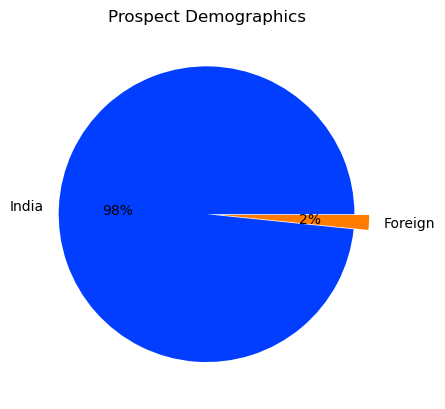

In [56]:
# declaring exploding pie 
explode = [0, 0.1] 
# define Seaborn color palette to use 
palette_color = sns.color_palette('bright') 
  
# plotting data on chart 
plt.pie(df['Country'].value_counts(),labels=["India","Foreign"] ,colors=palette_color, explode=explode,
        autopct='%.0f%%') 
plt.title('Prospect Demographics')
# displaying chart 
plt.show() 

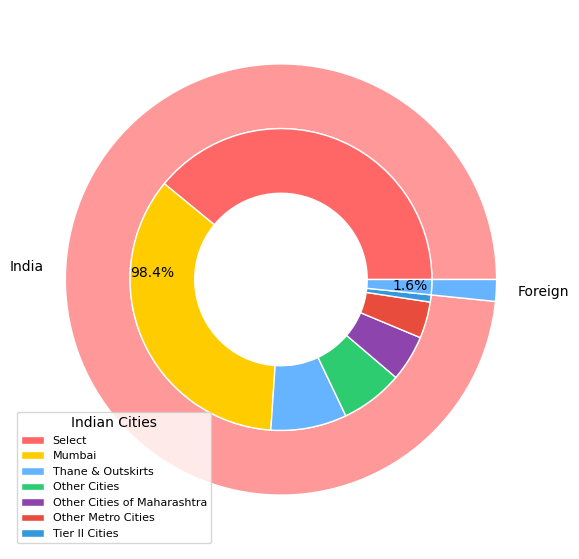

In [57]:
# Data for the outer pie (Country)
outer_labels = ['India', 'Foreign']  # Only Category A will have sub-categories
outer_sizes = [9090, 150]  # Size of the main categories
outer_colors = ['#ff9999', '#66b3ff']

# Data for the inner pie (Indian cities)
inner_labels = ['Select', 'Mumbai', 'Thane & Outskirts', 'Other Cities', 'Other Cities of Maharashtra', 'Other Metro Cities', 'Tier II Cities']  # Sub-categories for Category A
inner_sizes = list(df[df['Country'] == 'India']['City'].value_counts())  # Size of the sub-categories

# Define distinct contrasting colors for inner pie chart
inner_colors = ['#ff6666', '#ffcc00', '#66b3ff', '#2ecc71', '#8e44ad', '#e74c3c', '#3498db']

fig, ax = plt.subplots(figsize=(10, 7))  # Adjust the width and height


wedges_outer, texts_outer, autotexts_outer = ax.pie(
    outer_sizes, labels=outer_labels, colors=outer_colors, radius=1, 
    wedgeprops=dict(width=0.3, edgecolor='w'), autopct='%1.1f%%'
)

# The inner pie will reflect only the sub-categories for "India", and we'll add a dummy slice for "Foreign".

inner_sizes_full = inner_sizes + [sum(outer_sizes) - sum(inner_sizes)]  # The remaining size is for "Foreign"
inner_colors_full = inner_colors + ['#66b3ff']  # Use the same color for "Foreign" in the inner pie

# Create the inner pie chart
wedges_inner, _ = ax.pie(
    inner_sizes_full, colors=inner_colors_full, radius=0.7, 
    wedgeprops=dict(width=0.3, edgecolor='w')
)


ax.set(aspect="equal")

# Add a legend for the inner pie chart, positioned at the bottom left

plt.legend(wedges_inner[:-1], inner_labels, title="Indian Cities", loc="lower left", bbox_to_anchor=(0, 0), prop={'size': 8})

# Show the plot
plt.show()


- <span style="font-weight: bold;">Column:</span> Last Activity

In [58]:
# let's look at the values of this column
df['Last Activity'].value_counts()

Last Activity
Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: count, dtype: int64

In [59]:
#replacing null values with mode 
df.loc[df['Last Activity'].isnull(),'Last Activity'] = df['Last Activity'].mode()[0]

- <span style="font-weight: bold;">Columns:</span> "Page Views Per Visit" <span style="font-weight: bold;">&</span> "TotalVisits"

In [60]:
# Dropping rows with empty Page Views per visit and Totalvisits since only 1% of them is blank
df.dropna(subset=['Page Views Per Visit','TotalVisits'],inplace=True)

- <span style="font-weight: bold;">Column:</span> Specialization

In [61]:
# let's look at the values of this column
df['Specialization'].value_counts()

Specialization
Select                               1873
Finance Management                    962
Human Resource Management             838
Marketing Management                  824
Operations Management                 500
Business Administration               399
IT Projects Management                366
Supply Chain Management               346
Banking, Investment And Insurance     335
Travel and Tourism                    202
Media and Advertising                 202
International Business                176
Healthcare Management                 157
E-COMMERCE                            111
Hospitality Management                111
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: count, dtype: int64

In [62]:
#replacing null values with mode 
df.loc[df['Specialization'].isnull(),'Specialization']=df['Specialization'].mode()[0]

- <span style="font-weight: bold;">Column:</span> Lead Profile

In [63]:
# let's look at the values of this column
df['Lead Profile'].value_counts()

Lead Profile
Select                         4079
Potential Lead                 1559
Other Leads                     482
Student of SomeSchool           240
Lateral Student                  21
Dual Specialization Student      20
Name: count, dtype: int64

In [64]:
#replacing null values with mode
df.loc[df['Lead Profile'].isnull(),'Lead Profile']=df['Lead Profile'].mode()[0]

- <span style="font-weight: bold;">Column:</span> How did you hear about X Education

In [65]:
# let's look at the values of this column
df['How did you hear about X Education'].value_counts()

How did you hear about X Education
Select                   4914
Online Search             808
Word Of Mouth             348
Student of SomeSchool     310
Other                     186
Multiple Sources          152
Advertisements             70
Social Media               66
Email                      26
SMS                        23
Name: count, dtype: int64

In [66]:
df[df['How did you hear about X Education'].isnull()]['Lead Source'].value_counts()

Lead Source
Live Chat         851
Direct Traffic    600
Google            420
Organic Search    272
Referral Sites     48
Others              9
Name: count, dtype: int64

In [67]:
# trying to check if we can spot a trend between 'How did you hear about X Education' and 'Lead Source'. But looks like most of the values are null/select against these columns
pd.pivot_table(df[df['How did you hear about X Education']!='Select'],values = ['Prospect ID'], columns = ['How did you hear about X Education'], index = ['Lead Source'], aggfunc='count')


Prospect ID                         \
How did you hear about X Education Advertisements Email Multiple Sources   
Lead Source                                                                
Direct Traffic                                9.0   3.0             18.0   
Google                                       53.0  23.0            128.0   
Live Chat                                     1.0   NaN              1.0   
Organic Search                                4.0   NaN              4.0   
Others                                        2.0   NaN              NaN   
Reference                                     NaN   NaN              NaN   
Referral Sites                                1.0   NaN              1.0   
Welingak Website                              NaN   NaN              NaN   

                                                                            \
How did you hear about X Education Online Search  Other   SMS Social Media   
Lead Source                                                                  
Direct Traffic                             112.0   17.0   1.0          6.0   
Google                                     637.0  164.0  21.0         58.0   
Live Chat                                   16.0    3.0   NaN          1.0   
Organic Search                              32.0    2.0   1.0          1.0   
Others                                       2.0    NaN   NaN          NaN   
Reference                                    2.0    NaN   NaN          NaN   
Referral Sites                               6.0    NaN   NaN          NaN   
Welingak Website                             1.0    NaN   NaN          NaN   

                                                                        
How did you hear about X Education Student of SomeSchool Word Of Mouth  
Lead Source                                                             
Direct Traffic                                      63.0          48.0  
Google                                             228.0         282.0  
Live Chat                                            5.0           9.0  
Organic Search                                       9.0           7.0  
Others                                               1.0           1.0  
Reference                                            1.0           1.0  
Referral Sites                                       2.0           NaN  
Welingak Website                                     1.0           NaN

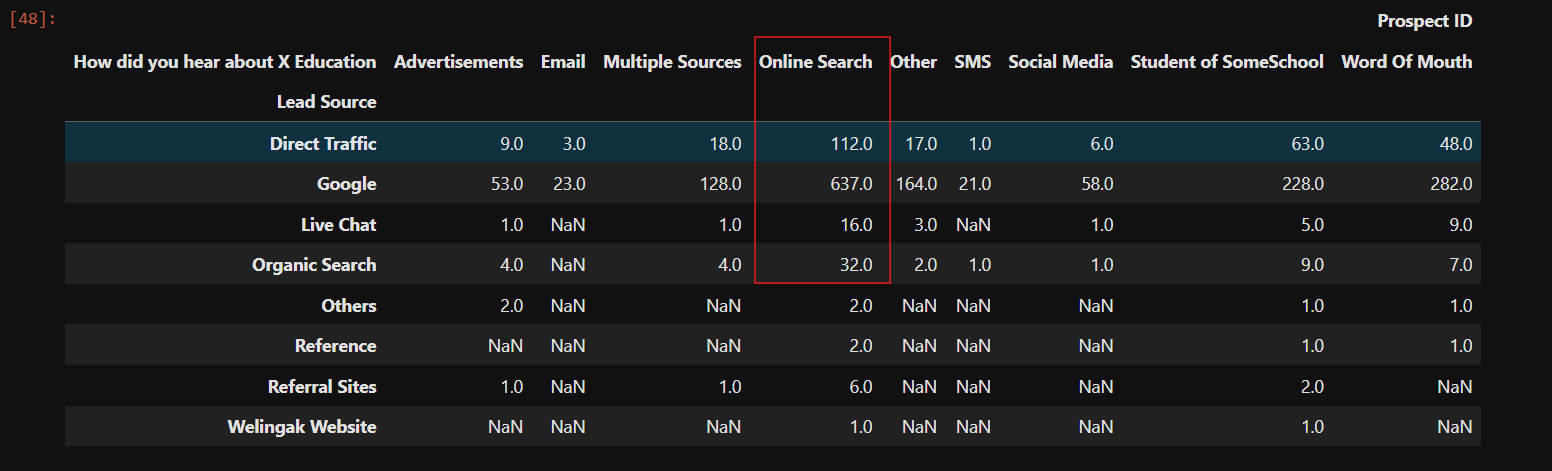

In [68]:
# Apart from null values, for below lead sources, "Online Search" appears to be a common value in "How did you hear about X Education"
# Lead Sources - 'Live Chat','Direct Traffic','Google','Organic Search'

df.loc[(df['How did you hear about X Education'].isnull()) & (df['Lead Source'].isin(['Live Chat','Direct Traffic','Google','Organic Search'])),'How did you hear about X Education'] = 'Online Search'

In [69]:
# Replacing remaining null values with mode value of the column
df.loc[df['How did you hear about X Education'].isnull(),'How did you hear about X Education'] = df['How did you hear about X Education'].mode()[0]

- <span style="font-weight: bold;">Column:</span> Occupation

In [70]:
# let's look at the values of this column
df['What is your current occupation'].value_counts()

What is your current occupation
Unemployed              5502
Working Professional     679
Student                  207
Other                     15
Housewife                  9
Businessman                8
Name: count, dtype: int64

In [71]:
# # Replacing remaining null values with mode value of the column
df.loc[df['What is your current occupation'].isnull(),'What is your current occupation'] = df['What is your current occupation'].mode()[0]

<span style="color: teal;font-weight: bold;">Dropping columns with more than 30% null values in them</span>

In [72]:
df.isnull().sum().sort_values(ascending=False)/df.shape[0]*100

Lead Quality                                     51.949907
Asymmetrique Profile Score                       45.787103
Asymmetrique Activity Score                      45.787103
Asymmetrique Profile Index                       45.787103
Asymmetrique Activity Index                      45.787103
Tags                                             36.614303
What matters most to you in choosing a course    29.682522
Prospect ID                                       0.000000
Digital Advertisement                             0.000000
Through Recommendations                           0.000000
Receive More Updates About Our Courses            0.000000
Lead Profile                                      0.000000
Update me on Supply Chain Content                 0.000000
Get updates on DM Content                         0.000000
X Education Forums                                0.000000
City                                              0.000000
I agree to pay the amount through cheque          0.0000

In [73]:
# dropping columns with more than 30% of the data null
for col in df.columns:
    if df[col].isnull().sum()/df.shape[0]*100 > 30:
        df.drop([col],axis=1,inplace=True)
    
        

In [74]:
# Alternatively
# df.drop(columns=['Asymmetrique Profile Score','Asymmetrique Activity Score','Asymmetrique Profile Index','Asymmetrique Activity Index','Tags','Lead Quality'],inplace=True)

- <span style="color: teal;font-weight: bold;">Next we will drop below variables, since the values in them are almost constant thorughout the data. Hence, do not provide much insight about the target variable.</span>
  - Search
  - Magazine
  - Newspaper Article
  - X Education Forums
  - Newspaper
  - Digital Advertisement
  - Through Recommendations
  - Receive More Updates About Our Courses
  - Update me on Supply Chain Content
  - Get updates on DM Content
  - I agree to pay the amount thr
  - What matters most to you in choosing a course
ugh cheque

In [75]:
# dropping below variables since they do not offer any variability to the dataset
df.drop(columns=['Search','Magazine','Newspaper Article','X Education Forums','Newspaper','Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses','Update me on Supply Chain Content','Get updates on DM Content','I agree to pay the amount through cheque','What matters most to you in choosing a course','What matters most to you in choosing a course'], inplace=True)

<span style="color: teal;font-weight: bold;">Again, let's take a look at the number of columns that we are left with and number of records</shape>

In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9103 entries, 0 to 9239
Data columns (total 19 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Prospect ID                             9103 non-null   object 
 1   Lead Number                             9103 non-null   int64  
 2   Lead Origin                             9103 non-null   object 
 3   Lead Source                             9103 non-null   object 
 4   Do Not Email                            9103 non-null   object 
 5   Do Not Call                             9103 non-null   object 
 6   Converted                               9103 non-null   int64  
 7   TotalVisits                             9103 non-null   float64
 8   Total Time Spent on Website             9103 non-null   int64  
 9   Page Views Per Visit                    9103 non-null   float64
 10  Last Activity                           9103 non-null   object 
 

<span style="color: teal;font-weight: bold;">Finally, let's take a look at the TARGET variable i.e. 'Converted'</span>

In [77]:
target = df['Converted'].value_counts()


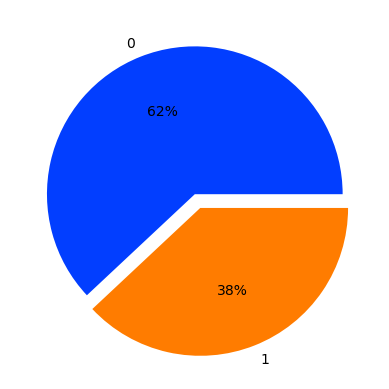

In [78]:
# declaring exploding pie 
explode = [0, 0.1] 
# define Seaborn color palette to use 
palette_color = sns.color_palette('bright') 
  
# plotting data on chart 
plt.pie(target,labels=[0,1] ,colors=palette_color, explode=explode,
        autopct='%.0f%%') 
  
# displaying chart 
plt.show() 

<span style="color: teal;font-weight: bold;">The gap between the converted and not-converted leads doesn't appear to be vast</span>

<span style="color: teal;font-weight: bold;">For categorical variables with multiple levels, let's create dummy features (one-hot encoded)</span>

In [79]:
# first we will take care of variables which have 'select' as one of the categories
df = pd.get_dummies(df, columns=['Specialization','How did you hear about X Education','Lead Profile','City'], dtype='int')

In [80]:
# dropping columns where feature indicates 'select' value 
na = []
for column in df.columns:
    if 'Select' in column:
        na.append(column)
df.drop(na, axis=1, inplace=True)  

In [81]:
# now let's create dummy feature for others
df = pd.get_dummies(df, columns=['Lead Origin','Lead Source','Do Not Email','Do Not Call','Last Activity','Country','What is your current occupation','A free copy of Mastering The Interview'], dtype='int',drop_first=True)

In [82]:
# we will also drop "last notable activity" column since it is similar to Last Activity and 'Prospect ID' since it's not very useful in our analysis
df.drop(['Last Notable Activity','Prospect ID'],axis=1,inplace=True)

In [83]:
# after dummy feature generation and removing redundant columns, let's take a look at remaining variables
df.shape

(9103, 78)

In [84]:
df.head()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,...,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Country_India,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,A free copy of Mastering The Interview_Yes
0,660737,0,0.0,0,0.0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
1,660728,0,5.0,674,2.5,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
2,660727,1,2.0,1532,2.0,0,1,0,0,0,...,0,0,0,1,0,0,1,0,0,1
3,660719,0,1.0,305,1.0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
4,660681,1,2.0,1428,1.0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0


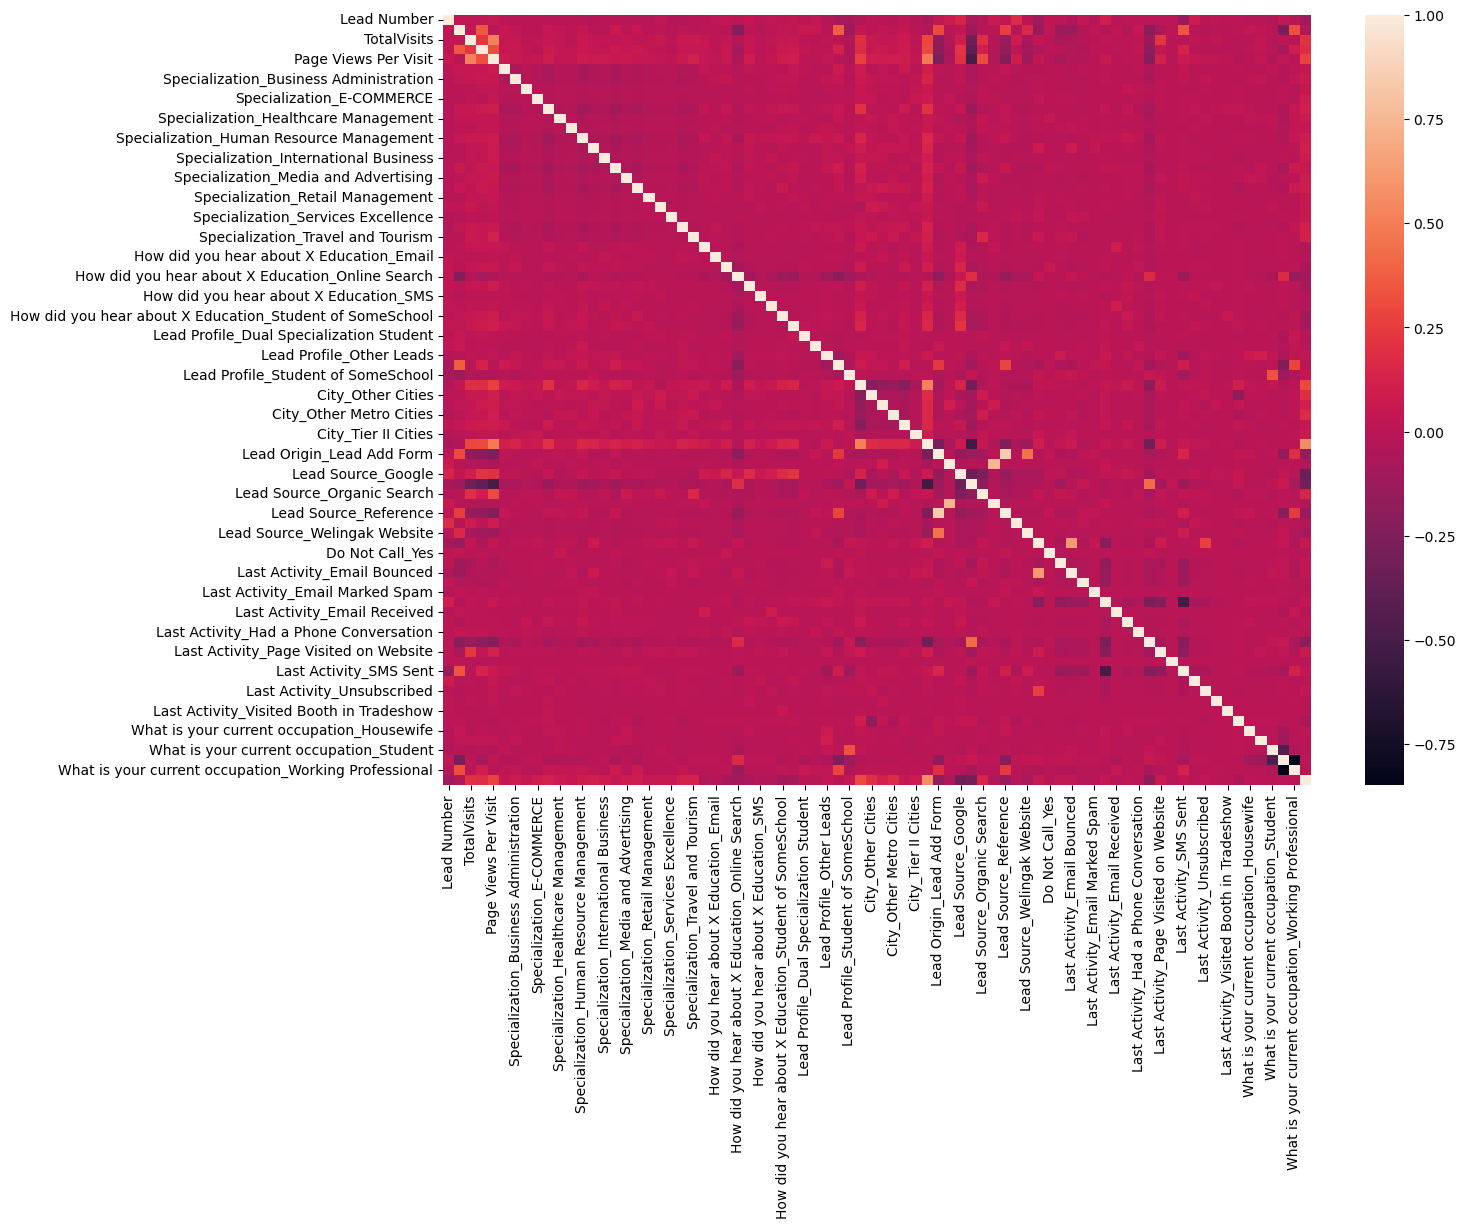

In [85]:
# let's take a look at correlation between these variables
plt.figure(figsize=(14, 10)) 
sns.heatmap(df.corr())
plt.show()

<span style="color: teal;font-weight: bold;">We do not see major correlation instances in the heatmap. Let's proceed with model building now!</span>

### Test Train Split

In [86]:
# importing important libraries
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn import metrics



In [87]:
X = df.drop(['Converted','Lead Number'],axis=1)
X.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,...,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Country_India,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,A free copy of Mastering The Interview_Yes
0,0.0,0,0.0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
1,5.0,674,2.5,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
2,2.0,1532,2.0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,1
3,1.0,305,1.0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
4,2.0,1428,1.0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0


In [88]:
Y = df['Converted']

In [89]:
x_train, x_test, y_train, y_test = train_test_split(X,Y,train_size=0.7,test_size=0.3, random_state=100)

In [90]:
print(x_train.shape)
print(x_test.shape)

(6372, 76)
(2731, 76)


### Feature Selection

In [91]:
from sklearn.preprocessing import StandardScaler

In [92]:
scaler = StandardScaler()
x_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(x_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])
x_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,...,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Country_India,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,A free copy of Mastering The Interview_Yes
7962,-0.092900,1.476324,-0.394072,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
5520,0.695064,-0.771066,2.111481,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
1962,0.301082,-0.571257,0.061483,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
1566,2.074000,1.393834,0.517039,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
9170,-0.683873,-0.881052,-1.077404,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0


<span style="color: teal;font-weight: bold;">Now that we have brought all features to the same scale, we will begin with feature selection for model building. Since the number of features is large,initially we will select features using RFE.</span>

### Feature selection using RFE (recursive feature elimination)

In [93]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(max_iter=200)

In [94]:
from sklearn.feature_selection import RFE
# we will initially select 15 features
rfe = RFE(estimator = logreg,n_features_to_select = 15)
rfe = rfe.fit(x_train, y_train)

In [95]:
rfe.support_

array([False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False,  True,  True, False,  True,  True, False,
       False, False, False, False, False, False,  True, False, False,
        True, False, False, False, False,  True,  True, False,  True,
       False, False, False, False, False, False,  True,  True, False,
       False,  True, False, False, False, False, False,  True, False,
       False, False,  True, False])

In [96]:
# let's check the list of columns and their corresponding ranking
list(zip(x_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', False, 34),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 43),
 ('Specialization_Banking, Investment And Insurance', False, 28),
 ('Specialization_Business Administration', False, 50),
 ('Specialization_E-Business', False, 13),
 ('Specialization_E-COMMERCE', False, 57),
 ('Specialization_Finance Management', False, 38),
 ('Specialization_Healthcare Management', False, 45),
 ('Specialization_Hospitality Management', False, 10),
 ('Specialization_Human Resource Management', False, 46),
 ('Specialization_IT Projects Management', False, 30),
 ('Specialization_International Business', False, 62),
 ('Specialization_Marketing Management', False, 29),
 ('Specialization_Media and Advertising', False, 58),
 ('Specialization_Operations Management', False, 39),
 ('Specialization_Retail Management', False, 44),
 ('Specialization_Rural and Agribusiness', False, 25),
 ('Specialization_Services Excellence', False, 19),
 ('Specialization_Supply Chain Manag

In [97]:
# assigning the top 15 columns to 'col'
col=x_train.columns[rfe.support_]

In [98]:
# creating a new dataframe containing 15 columns selected using RFE
x_train_rfe = x_train[col]

In [99]:
# RFE logistic model I

# adding constant
x_train_sm = sm.add_constant(x_train_rfe)
# logictic regression model
logml1 = sm.GLM(y_train, x_train_sm, family = sm.families.Binomial())
logml1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6356
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2529.0
Date:                Tue, 22 Oct 2024   Deviance:                       5057.9
Time:                        12:34:57   Pearson chi2:                 6.65e+03
No. Iterations:                    22   Pseudo R-squ. (CS):             0.4137
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.6577      0.060    -27.760      0.000      -1.775      -1.541
Total Time Spent on Website                              1.0946      0.041     26.946      0.000       1.015       1.174
Lead Profile_Dual Specialization Student                23.8935    1.9e+04      0.001      0.999   -3.72e+04    3.72e+04
Lead Profile_Lateral Student                            23.7057   1.85e+04      0.001      0.999   -3.62e+04    3.63e+04
Lead Profile_Potential Lead                              1.7031      0.099     17.171      0.000       1.509       1.898
Lead Profile_Student of SomeSchool                      -1.6850      0.444     -3.791      0.000      -2.556      -0.814
Lead Origin_Lead Add Form                                3.4466      0.228     15.087      0.000       2.999       3.894
Lead Source_Live Chat                                    1.2400      0.107     11.620      0.000       1.031       1.449
Lead Source_Welingak Website                             2.5115      0.755      3.325      0.001       1.031       3.992
Do Not Email_Yes                                        -1.4690      0.167     -8.777      0.000      -1.797      -1.141
Last Activity_Converted to Lead                         -1.2051      0.216     -5.580      0.000      -1.628      -0.782
Last Activity_Had a Phone Conversation                   1.5610      0.656      2.378      0.017       0.274       2.848
Last Activity_Olark Chat Conversation                   -1.4040      0.166     -8.456      0.000      -1.729      -1.079
Last Activity_SMS Sent                                   1.2931      0.077     16.864      0.000       1.143       1.443
What is your current occupation_Housewife               24.3201   2.56e+04      0.001      0.999   -5.01e+04    5.02e+04
What is your current occupation_Working Professional     2.5505      0.191     13.337      0.000       2.176       2.925
========================================================================================================================
"""

In [100]:
# Creating a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = x_train_sm.columns
vif['VIF'] = [variance_inflation_factor(x_train_sm.values, i) for i in range(x_train_sm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,2.60
6,Lead Origin_Lead Add Form,1.55
7,Lead Source_Live Chat,1.44
8,Lead Source_Welingak Website,1.33
1,Total Time Spent on Website,1.31
12,Last Activity_Olark Chat Conversation,1.28
4,Lead Profile_Potential Lead,1.17
13,Last Activity_SMS Sent,1.13
15,What is your current occupation_Working Profes...,1.12
10,Last Activity_Converted to Lead,1.06


<span style="color: teal;font-weight: bold;">While feature VIFs seem to be under control there are features with very high p-value, which is indicates that these features do not play a stronng role in defining target variable</span>

In [101]:
# iteration 2
# dropping feature with high p-value
x_train_rfe.drop(['Lead Profile_Dual Specialization Student'],axis=1,inplace=True)

In [102]:
# RFE logistic model I - iteration 2
x_train_sm = sm.add_constant(x_train_rfe)
# logictic regression model
logml2 = sm.GLM(y_train, x_train_sm, family = sm.families.Binomial())
logml2.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6357
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2540.0
Date:                Tue, 22 Oct 2024   Deviance:                       5079.9
Time:                        12:34:57   Pearson chi2:                 6.67e+03
No. Iterations:                    22   Pseudo R-squ. (CS):             0.4117
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.6459      0.059    -27.681      0.000      -1.762      -1.529
Total Time Spent on Website                              1.0975      0.041     27.039      0.000       1.018       1.177
Lead Profile_Lateral Student                            23.6920   1.85e+04      0.001      0.999   -3.62e+04    3.62e+04
Lead Profile_Potential Lead                              1.6927      0.099     17.074      0.000       1.498       1.887
Lead Profile_Student of SomeSchool                      -1.6988      0.445     -3.820      0.000      -2.570      -0.827
Lead Origin_Lead Add Form                                3.4404      0.228     15.070      0.000       2.993       3.888
Lead Source_Live Chat                                    1.2372      0.107     11.617      0.000       1.029       1.446
Lead Source_Welingak Website                             2.5078      0.755      3.321      0.001       1.028       3.988
Do Not Email_Yes                                        -1.4535      0.166     -8.742      0.000      -1.779      -1.128
Last Activity_Converted to Lead                         -1.2188      0.216     -5.642      0.000      -1.642      -0.795
Last Activity_Had a Phone Conversation                   1.5503      0.656      2.362      0.018       0.264       2.836
Last Activity_Olark Chat Conversation                   -1.4122      0.166     -8.507      0.000      -1.738      -1.087
Last Activity_SMS Sent                                   1.2876      0.077     16.828      0.000       1.138       1.438
What is your current occupation_Housewife               24.3102   2.56e+04      0.001      0.999   -5.01e+04    5.02e+04
What is your current occupation_Working Professional     2.5661      0.191     13.462      0.000       2.193       2.940
========================================================================================================================
"""

In [103]:
# iteration 3
# dropping feature with high p-value
x_train_rfe.drop(['Lead Profile_Lateral Student'],axis=1,inplace=True)

In [104]:
# RFE logistic model I - iteration 3
x_train_sm = sm.add_constant(x_train_rfe)
# logictic regression model
logml3 = sm.GLM(y_train, x_train_sm, family = sm.families.Binomial())
logml3.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6358
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2549.2
Date:                Tue, 22 Oct 2024   Deviance:                       5098.5
Time:                        12:34:57   Pearson chi2:                 6.70e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.4100
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.6348      0.059    -27.598      0.000      -1.751      -1.519
Total Time Spent on Website                              1.0993      0.041     27.132      0.000       1.020       1.179
Lead Profile_Potential Lead                              1.6825      0.099     16.978      0.000       1.488       1.877
Lead Profile_Student of SomeSchool                      -1.7108      0.445     -3.844      0.000      -2.583      -0.838
Lead Origin_Lead Add Form                                3.4683      0.228     15.222      0.000       3.022       3.915
Lead Source_Live Chat                                    1.2327      0.106     11.600      0.000       1.024       1.441
Lead Source_Welingak Website                             2.4723      0.755      3.275      0.001       0.993       3.952
Do Not Email_Yes                                        -1.4453      0.165     -8.745      0.000      -1.769      -1.121
Last Activity_Converted to Lead                         -1.2303      0.216     -5.695      0.000      -1.654      -0.807
Last Activity_Had a Phone Conversation                   1.5752      0.648      2.431      0.015       0.305       2.845
Last Activity_Olark Chat Conversation                   -1.4186      0.166     -8.548      0.000      -1.744      -1.093
Last Activity_SMS Sent                                   1.2800      0.076     16.758      0.000       1.130       1.430
What is your current occupation_Housewife               23.2995   1.55e+04      0.002      0.999   -3.04e+04    3.04e+04
What is your current occupation_Working Professional     2.5747      0.190     13.541      0.000       2.202       2.947
========================================================================================================================
"""

In [105]:
# iteration 4
# dropping feature with high p-value
x_train_rfe.drop(['What is your current occupation_Housewife'],axis=1,inplace=True)

In [106]:
# RFE logistic model I - iteration 4
x_train_sm = sm.add_constant(x_train_rfe)
# logictic regression model
logml4 = sm.GLM(y_train, x_train_sm, family = sm.families.Binomial())
logml4.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6359
Model Family:                Binomial   Df Model:                           12
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2555.8
Date:                Tue, 22 Oct 2024   Deviance:                       5111.7
Time:                        12:34:58   Pearson chi2:                 6.71e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4088
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.6250      0.059    -27.523      0.000      -1.741      -1.509
Total Time Spent on Website                              1.0987      0.040     27.153      0.000       1.019       1.178
Lead Profile_Potential Lead                              1.6803      0.099     16.980      0.000       1.486       1.874
Lead Profile_Student of SomeSchool                      -1.7175      0.445     -3.859      0.000      -2.590      -0.845
Lead Origin_Lead Add Form                                3.4766      0.228     15.269      0.000       3.030       3.923
Lead Source_Live Chat                                    1.2261      0.106     11.553      0.000       1.018       1.434
Lead Source_Welingak Website                             2.4586      0.755      3.257      0.001       0.979       3.938
Do Not Email_Yes                                        -1.4498      0.165     -8.776      0.000      -1.774      -1.126
Last Activity_Converted to Lead                         -1.2386      0.216     -5.736      0.000      -1.662      -0.815
Last Activity_Had a Phone Conversation                   1.5660      0.648      2.417      0.016       0.296       2.836
Last Activity_Olark Chat Conversation                   -1.4237      0.166     -8.581      0.000      -1.749      -1.098
Last Activity_SMS Sent                                   1.2716      0.076     16.670      0.000       1.122       1.421
What is your current occupation_Working Professional     2.5692      0.190     13.515      0.000       2.197       2.942
========================================================================================================================
"""

In [107]:
# let's check VIF once again
vif = pd.DataFrame()
vif['Features'] = x_train_sm.columns
vif['VIF'] = [variance_inflation_factor(x_train_sm.values, i) for i in range(x_train_sm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,2.58
4,Lead Origin_Lead Add Form,1.54
5,Lead Source_Live Chat,1.44
6,Lead Source_Welingak Website,1.33
1,Total Time Spent on Website,1.31
10,Last Activity_Olark Chat Conversation,1.28
2,Lead Profile_Potential Lead,1.17
11,Last Activity_SMS Sent,1.13
12,What is your current occupation_Working Profes...,1.12
8,Last Activity_Converted to Lead,1.06


<span style="color: teal;font-weight: bold;"> Now since VIF and p-value is below 5 and 0.05 respectively. Let's check the predictions made by this model</span>

In [108]:
res = logml4.fit()
# getting the predicted values on the train set
y_train_pred = res.predict(x_train_sm)
y_train_pred[:10]

7962    0.780512
5520    0.077834
1962    0.272687
1566    0.984572
9170    0.577723
5097    0.203120
8954    0.757380
309     0.112716
5519    0.476185
1050    0.782560
dtype: float64

In [109]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.78051152, 0.0778344 , 0.27268662, 0.98457159, 0.57772294,
       0.2031197 , 0.75737997, 0.11271628, 0.47618492, 0.78256021])

<span style="color: teal;font-weight: bold;">Creating a dataframe with the actual converted and the predicted probabilities</span>

In [110]:
# creating a dataframe with predicted probability and actual Converted feature
y_train_pred_final = pd.DataFrame({'Converted':y_train.values,'convert_prob':y_train_pred})
y_train_pred_final['lead number'] = y_train.index
y_train_pred_final.head()

,Converted,convert_prob,lead number
0,0,0.780512,7962
1,0,0.077834,5520
2,0,0.272687,1962
3,1,0.984572,1566
4,0,0.577723,9170


In [111]:
# creating a column to contain predicted converted values considering 0.5 to be the cut-off
y_train_pred_final['predicted'] = y_train_pred_final.convert_prob.map(lambda x: 1 if x>0.5 else 0)
y_train_pred_final.head()

,Converted,convert_prob,lead number,predicted
0,0,0.780512,7962,1
1,0,0.077834,5520,0
2,0,0.272687,1962,0
3,1,0.984572,1566,1
4,0,0.577723,9170,1


In [112]:
# Confusion Metrics

In [113]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted,y_train_pred_final.predicted)
confusion

array([[3538,  415],
       [ 758, 1661]], dtype=int64)

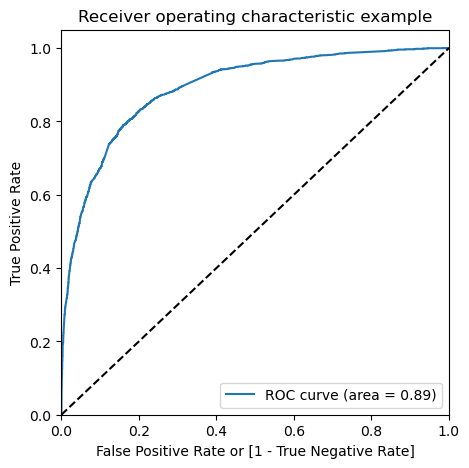

In [114]:
# Defining the function to plot the ROC curve
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

# Calling the function
draw_roc(y_train_pred_final.Converted, y_train_pred_final.convert_prob)

<span style="color: teal;font-weight: bold;">Area under the curve is 89% which is a good indication of out first model being strong. Let's see if we can make it better.</span>

<span style="color: teal;font-weight: bold;">Next, we are going to try to remove feature with small absolute coefficient value and check model's performance</span>

### Model II

In [115]:
# dropping a fetaure with smallest absolute coefficient
x_train_rfe.drop(['Total Time Spent on Website'],axis=1,inplace=True)

In [116]:
# RFE logistic model II
x_train_sm = sm.add_constant(x_train_rfe)
# logictic regression model
logml5 = sm.GLM(y_train, x_train_sm, family = sm.families.Binomial())
logml5.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6360
Model Family:                Binomial   Df Model:                           11
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2997.2
Date:                Tue, 22 Oct 2024   Deviance:                       5994.5
Time:                        12:34:59   Pearson chi2:                 6.62e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3209
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.2415      0.050    -24.950      0.000      -1.339      -1.144
Lead Profile_Potential Lead                              1.7179      0.090     19.045      0.000       1.541       1.895
Lead Profile_Student of SomeSchool                      -1.5042      0.421     -3.571      0.000      -2.330      -0.679
Lead Origin_Lead Add Form                                2.2911      0.221     10.372      0.000       1.858       2.724
Lead Source_Live Chat                                    0.0093      0.090      0.103      0.918      -0.167       0.185
Lead Source_Welingak Website                             2.3710      0.754      3.146      0.002       0.894       3.848
Do Not Email_Yes                                        -1.5035      0.155     -9.690      0.000      -1.808      -1.199
Last Activity_Converted to Lead                         -1.1652      0.201     -5.785      0.000      -1.560      -0.770
Last Activity_Had a Phone Conversation                   1.5810      0.585      2.702      0.007       0.434       2.728
Last Activity_Olark Chat Conversation                   -1.3667      0.156     -8.747      0.000      -1.673      -1.060
Last Activity_SMS Sent                                   1.2901      0.069     18.718      0.000       1.155       1.425
What is your current occupation_Working Professional     2.5795      0.179     14.443      0.000       2.229       2.929
========================================================================================================================
"""

In [117]:
# checking the VIF values again
vif = pd.DataFrame()
vif['Features'] = x_train_sm.columns
vif['VIF'] = [variance_inflation_factor(x_train_sm.values, i) for i in range(x_train_sm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,2.54
3,Lead Origin_Lead Add Form,1.43
5,Lead Source_Welingak Website,1.33
9,Last Activity_Olark Chat Conversation,1.28
4,Lead Source_Live Chat,1.25
1,Lead Profile_Potential Lead,1.15
10,Last Activity_SMS Sent,1.12
11,What is your current occupation_Working Profes...,1.11
7,Last Activity_Converted to Lead,1.06
2,Lead Profile_Student of SomeSchool,1.02


<span style="color: teal;font-weight: bold;">After removing 'Total Time spent on Website' feature, we can see that the p-value of one of the features has spiked immensely. Let's try and drop this feature!</span>

In [118]:
x_train_rfe.drop(['Lead Source_Live Chat'],axis=1,inplace=True)

In [119]:
# RFE logistic model II - iteration 1
x_train_sm = sm.add_constant(x_train_rfe)
# logictic regression model
logml6 = sm.GLM(y_train, x_train_sm, family = sm.families.Binomial())
logml6.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6361
Model Family:                Binomial   Df Model:                           10
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2997.2
Date:                Tue, 22 Oct 2024   Deviance:                       5994.5
Time:                        12:34:59   Pearson chi2:                 6.62e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3209
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.2398      0.047    -26.395      0.000      -1.332      -1.148
Lead Profile_Potential Lead                              1.7173      0.090     19.079      0.000       1.541       1.894
Lead Profile_Student of SomeSchool                      -1.5035      0.421     -3.571      0.000      -2.329      -0.678
Lead Origin_Lead Add Form                                2.2899      0.221     10.381      0.000       1.858       2.722
Lead Source_Welingak Website                             2.3705      0.754      3.145      0.002       0.893       3.848
Do Not Email_Yes                                        -1.5038      0.155     -9.694      0.000      -1.808      -1.200
Last Activity_Converted to Lead                         -1.1667      0.201     -5.809      0.000      -1.560      -0.773
Last Activity_Had a Phone Conversation                   1.5798      0.585      2.701      0.007       0.433       2.726
Last Activity_Olark Chat Conversation                   -1.3622      0.150     -9.063      0.000      -1.657      -1.068
Last Activity_SMS Sent                                   1.2896      0.069     18.747      0.000       1.155       1.424
What is your current occupation_Working Professional     2.5789      0.179     14.447      0.000       2.229       2.929
========================================================================================================================
"""

In [120]:
vif = pd.DataFrame()
vif['Features'] = x_train_sm.columns
vif['VIF'] = [variance_inflation_factor(x_train_sm.values, i) for i in range(x_train_sm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,2.29
3,Lead Origin_Lead Add Form,1.42
4,Lead Source_Welingak Website,1.32
1,Lead Profile_Potential Lead,1.15
9,Last Activity_SMS Sent,1.12
10,What is your current occupation_Working Profes...,1.11
8,Last Activity_Olark Chat Conversation,1.09
6,Last Activity_Converted to Lead,1.05
2,Lead Profile_Student of SomeSchool,1.02
5,Do Not Email_Yes,1.02


<span style="color: teal;font-weight: bold;"> Now since VIF and p-value is below 5 and 0.05 respectively. Let's check the predictions made by this model</span>

In [121]:
res = logml6.fit()
# getting the predicted values on the train set
y_train_pred = res.predict(x_train_sm)
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.51246678, 0.2244771 , 0.51246678, 0.95505931, 0.61717196,
       0.2244771 , 0.8541095 , 0.2244771 , 0.51246678, 0.61717196])

In [122]:
# creating a dataframe with predicted probabilities
y_train_pred_final3 = pd.DataFrame({'Converted':y_train.values,'convert_prob':y_train_pred})
y_train_pred_final3['lead number'] = y_train.index
y_train_pred_final3.head()

,Converted,convert_prob,lead number
0,0,0.512467,7962
1,0,0.224477,5520
2,0,0.512467,1962
3,1,0.955059,1566
4,0,0.617172,9170


In [123]:
y_train_pred_final3['predicted'] = y_train_pred_final3.convert_prob.map(lambda x: 1 if x>0.5 else 0)
y_train_pred_final3.head()

,Converted,convert_prob,lead number,predicted
0,0,0.512467,7962,1
1,0,0.224477,5520,0
2,0,0.512467,1962,1
3,1,0.955059,1566,1
4,0,0.617172,9170,1


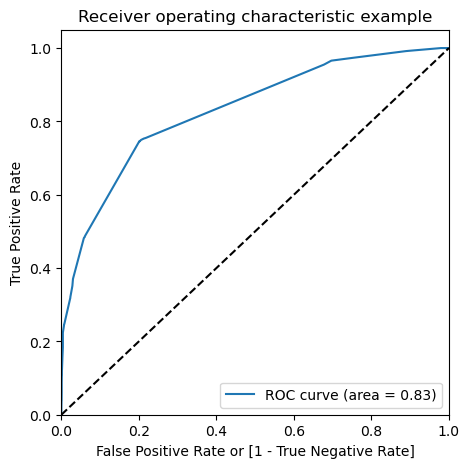

In [124]:
# Defining the function to plot the ROC curve
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

# Calling the function
draw_roc(y_train_pred_final3.Converted, y_train_pred_final3.convert_prob)

<span style="color: teal;font-weight: bold;">A comparison with the ROC of previous curve indicates a decrease in area as compared to last model. Hence we can concelude that removing "Total Time Spent on Website" and subsequent feature has led to a degraded model. Removing any other feature from the model also doesn't seem to be a good idea since all of them have a significant coefficient to them.</span>

<span style="color: teal;font-weight: bold;">Therefore, we will continue to work with first model.</span>

# Verifying the cut-off limit in original model

<span style="color: teal;font-weight: bold;">Previously we created model I with a cutoff limit of 0.5. Let's now try to find the optimal limit of our model such that the 'False Negatives' are minimum. We would not want any potential lead to be identified otherwise</span>

In [125]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    y_train_pred_final.predicted = y_train_pred_final.convert_prob.map(lambda x: 1 if x>i else 0)
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted)
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)


     prob  accuracy     sensi     speci
0.0   0.0  0.379630  1.000000  0.000000
0.1   0.1  0.635122  0.965688  0.432836
0.2   0.2  0.732894  0.933030  0.610422
0.3   0.3  0.805399  0.840430  0.783962
0.4   0.4  0.821563  0.778007  0.848217
0.5   0.5  0.815913  0.686647  0.895016
0.6   0.6  0.812147  0.625465  0.926385
0.7   0.7  0.794884  0.540306  0.950670
0.8   0.8  0.768675  0.436544  0.971920
0.9   0.9  0.725989  0.294750  0.989881


------------------------------------------------------------------
------------------------------------------------------------------
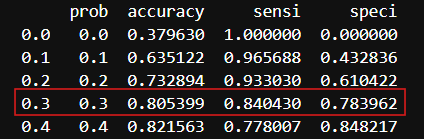
---------------------------------------------------------------------
-------------------------------------------------------------------

<span style="color: teal;font-weight: bold;"> We clearly seem to achieve a optimum limit at 0.3 where senstivity i.e. number of true positives / (number of true positives + number of false negatives) seems to be achieving it's maximum without compromising the the accuarcy and specificity of the model.</span>

In [126]:
# let's look at the predicted values at the cut-off of 0.3
y_train_pred_final['predicted'] = y_train_pred_final.convert_prob.map(lambda x: 1 if x>0.3 else 0)
y_train_pred_final.head()

,Converted,convert_prob,lead number,predicted
0,0,0.780512,7962,1
1,0,0.077834,5520,0
2,0,0.272687,1962,0
3,1,0.984572,1566,1
4,0,0.577723,9170,1


In [127]:
# let's create a confusion matrix
confusion = metrics.confusion_matrix(y_train_pred_final.Converted,y_train_pred_final.predicted)
confusion

array([[3099,  854],
       [ 386, 2033]], dtype=int64)

<span style="color: teal;font-weight: bold;">ELements of above confusion matrix can be identified as below -</span>

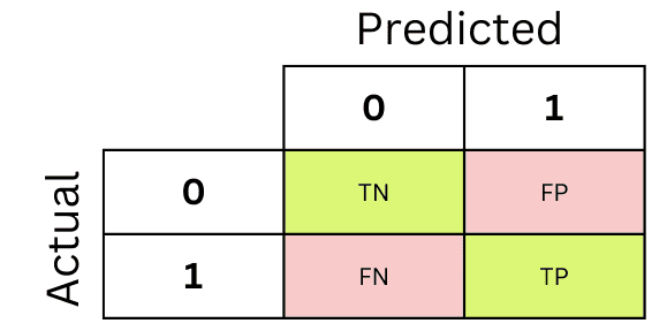

<span style="color: teal;font-weight: bold;">Let's take a look at the accuaracy and other evaluation metrcies of this model</span>

In [128]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives


accuracy = (TP+TN)/(TP+TN+FP+FN)
speci = TN/(TN+FP)
sensi = TP/(FN+TP)

print('Accuracy = ', round(accuracy,2))
print('Specificity = ',round(speci,2))
print('Senitivity =',round(sensi,2))

Accuracy =  0.81
Specificity =  0.78
Senitivity = 0.84


<span style="color: teal;font-weight: bold;">In order to verify the cut-off limit, let's also check below graph of Accuracy, Sensitivity, and Specificity tradeoff. In which we can clearly observe the optimal cut-off to be between 0.2 and 0.4.</span>


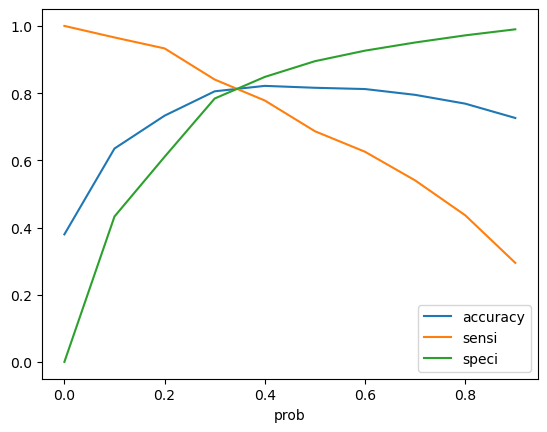

In [129]:
cutoff_df.plot.line(x='prob',y=['accuracy','sensi','speci'])
plt.show()

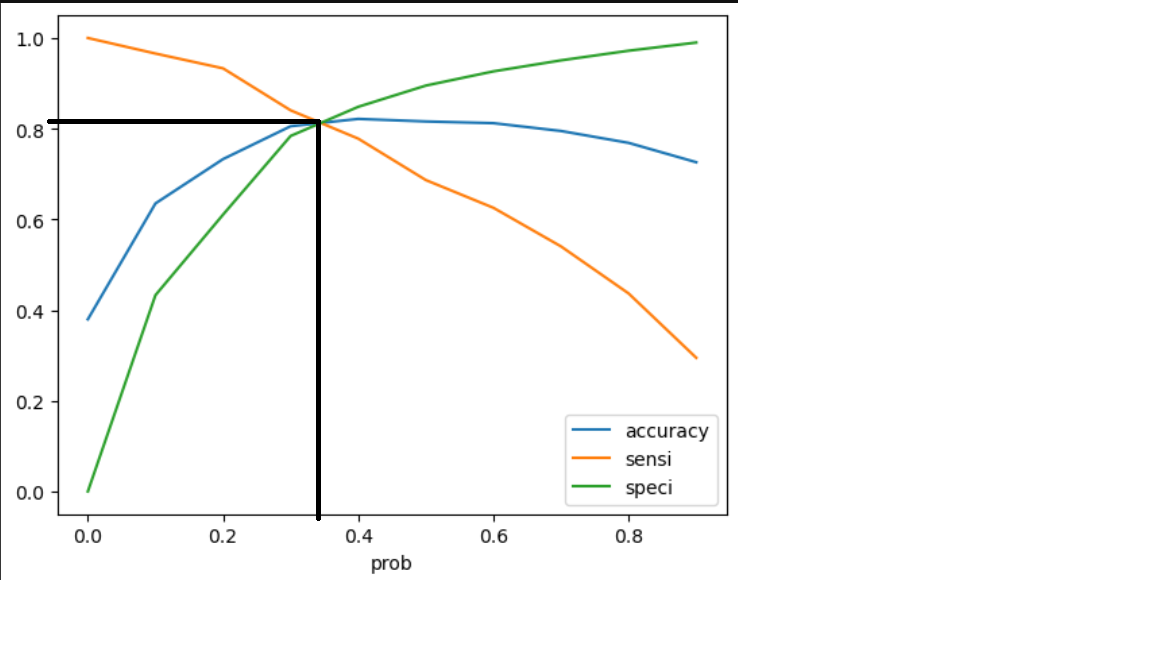

### Making predictions on test set

In [130]:
# Scaling features in test-set
x_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.transform(x_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])
x_test.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,...,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Country_India,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,A free copy of Mastering The Interview_Yes
3504,-0.092900,-0.103815,0.289261,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,1
4050,-0.683873,-0.881052,-1.077404,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
7201,-0.289891,0.424120,-0.166294,0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,1,0,1
1196,0.104091,-0.105648,0.744816,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,1
8219,0.695064,-0.428274,-0.280183,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,1,0,1


In [131]:
# creating a new dataframe with required columns
x_test_df = x_test[col]

In [132]:
x_test_df.drop(['Lead Profile_Dual Specialization Student','Lead Profile_Lateral Student','What is your current occupation_Housewife'],axis=1,inplace=True)

In [133]:
# adding constant to the test data
x_test_sm = sm.add_constant(x_test_df)

In [134]:
# generating prediction on the test data
y_test_pred = logml4.fit().predict(x_test_sm)

In [135]:
# checking 10 prediction records
y_test_pred[:10]

3504    0.149436
4050    0.978867
7201    0.207963
1196    0.149180
8219    0.109533
8747    0.203120
9048    0.365755
6524    0.095646
7693    0.077617
8187    0.896157
dtype: float64

In [136]:
# creating dataframe out of test predictions
y_pred_1 = pd.DataFrame(y_test_pred)
y_pred_1.head()

,0
3504,0.149436
4050,0.978867
7201,0.207963
1196,0.149180
8219,0.109533


In [137]:
# creating a new dataframe of actual converted values
y_test_df = pd.DataFrame(y_test)

In [138]:
y_test_df['Lead Number'] = y_test_df.index
y_test_df

,Converted,Lead Number
3504,0,3504
4050,1,4050
7201,0,7201
1196,0,1196
8219,1,8219
...,...,...
6508,0,6508
315,0,315
3766,0,3766
8043,1,8043


In [139]:
# resetting index on the two dataframes
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [140]:
# concating the test and predicted values
y_pred_final = pd.concat([y_test_df,y_pred_1], axis=1)
y_pred_final.head()

,Converted,Lead Number,0
0,0,3504,0.149436
1,1,4050,0.978867
2,0,7201,0.207963
3,0,1196,0.149180
4,1,8219,0.109533


In [141]:
# renaming the predicted probabilities
y_pred_final = y_pred_final.rename(columns={0:'Convert_Prob'})

In [142]:
y_pred_final = y_pred_final.reindex(['Lead Number','Converted','Convert_Prob'], axis=1)
y_pred_final.head()

,Lead Number,Converted,Convert_Prob
0,3504,0,0.149436
1,4050,1,0.978867
2,7201,0,0.207963
3,1196,0,0.149180
4,8219,1,0.109533


In [143]:
# Generating new values for Converted column based on the probability cut-off of 0.3
y_pred_final['predicted'] = y_pred_final.Convert_Prob.map(lambda x: 1 if x>0.3 else 0)
y_pred_final.head()

,Lead Number,Converted,Convert_Prob,predicted
0,3504,0,0.149436,0
1,4050,1,0.978867,1
2,7201,0,0.207963,0
3,1196,0,0.149180,0
4,8219,1,0.109533,0


<span style="color: teal;font-weight: bold;">Let's verify the evaluation metrices on the test data!</span>

In [144]:

# accuracy
metrics.accuracy_score(y_pred_final.Converted,y_pred_final.predicted)

0.8169168802636397

In [145]:
# Confusion Matix
confusion_test = metrics.confusion_matrix(y_pred_final.Converted,y_pred_final.predicted)
confusion_test

array([[1329,  360],
       [ 140,  902]], dtype=int64)

In [146]:
TP = confusion_test[1,1] # true positive 
TN = confusion_test[0,0] # true negatives
FP = confusion_test[0,1] # false positives
FN = confusion_test[1,0] # false negatives


In [147]:
# specificity
TN/float(TN+FP)

0.7868561278863233

In [148]:
# sensitivity
TP/float(TP+FN)

0.8656429942418427

<span style="color: teal;font-weight: bold;"> Evaluation matrix holds good on test data as well. Therefore, this model can be deemed good for our purpose</span>